In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
train= pd.read_csv('Train_Data.csv')
x_test= pd.read_csv('Test_Data.csv')

In [74]:
train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [76]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost         318 non-null    float64
 5   impressions  318 non-null    int64  
 6   clicks       318 non-null    int64  
 7   conversions  318 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


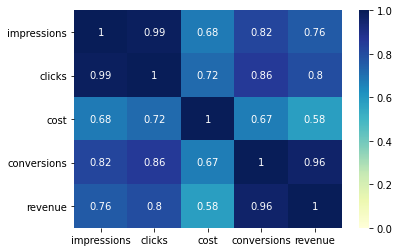

In [77]:
sns.heatmap(train.corr(),annot=True, vmin=0, vmax=1,cmap="YlGnBu")
plt.show()

In [78]:
train.describe(percentiles= [0.99,.999],include= 'all')

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
count,4571,4571,4571,4571,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
unique,212,1,4,70,NaN,NaN,NaN,NaN,NaN
top,30-10-2020,campaign 1,adgroup 3,ad 3,NaN,NaN,NaN,NaN,NaN
freq,35,4571,1672,617,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,92.635747,43.340844,2.800834,1.339094,231.865340
std,NaN,NaN,NaN,NaN,198.349737,100.164913,14.361618,5.223922,1091.742763
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,16.000000,7.000000,0.210000,0.000000,0.000000
99%,NaN,NaN,NaN,NaN,822.300000,391.800000,40.402000,19.000000,3478.108000
99.9%,NaN,NaN,NaN,NaN,1974.800000,1109.450000,205.189100,80.290000,17429.780900


In [79]:
train.drop(['campaign','date'],axis=1, inplace=True)

In [80]:
train[train['cost']>205]

,adgroup,ad,impressions,clicks,cost,conversions,revenue
2248,adgroup 1,ad 42,2023,1103,228.20,39,8216.89
2262,adgroup 1,ad 43,3239,1771,531.25,94,15299.90
2264,adgroup 3,ad 43,1906,1193,265.44,43,6632.64
2272,adgroup 3,ad 44,1799,1118,241.70,79,11928.85
2273,adgroup 1,ad 44,1673,986,297.96,59,9667.25


In [81]:
group = pd.get_dummies(train['adgroup'], drop_first = True)
train = pd.concat([train, group], axis = 1)

In [82]:
train['ad'] = train['ad'].map(lambda x: x.lstrip('ad '))

In [83]:
train['ad']=train['ad'].astype(str).astype(int)

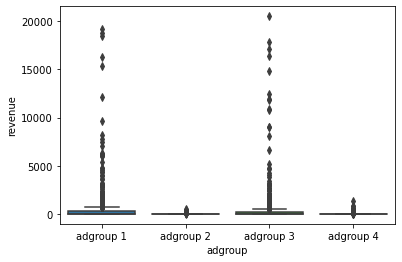

In [84]:
sns.boxplot(x=train.adgroup,y=train.revenue)

In [85]:
#sns.pairplot(train)
#plt.show()
train.drop('adgroup',axis=1, inplace=True)

In [87]:
train.drop('adgroup',axis=1, inplace=True)from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['ad','impressions', 'clicks', 'cost', 'conversions', 'revenue']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [89]:
y_train = train.pop('revenue')
x_train = train

In [91]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const         -0.000881
ad            -0.001407
impressions   -0.234126
clicks         0.240627
cost          -0.244211
conversions    1.008019
adgroup 2      0.001136
adgroup 3     -0.000665
adgroup 4      0.001128
dtype: float64

In [92]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     8900.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:37:41   Log-Likelihood:                 13345.
No. Observations:                4571   AIC:                        -2.667e+04
Df Residuals:                    4562   BIC:                        -2.661e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0009      0.000     -1.947      0.052      -0.002    6.16e-06
ad             -0.0014      0.001     -2.024      0.043      -0.003   -4.43e-05
impressions    -0.2341      0.023    -10.159      0.000      -0.279      -0.189
clicks          0.2406      0.028      8.599      0.000       0.186       0.295
cost           -0.2442      0.011    -22.644      0.000      -0.265      -0.223
conversions     1.0080      0.007    140.265      0.000       0.994       1.022
adgroup 2       0.0011      0.001      1.770      0.077      -0.000       0.002
adgroup 3      -0.0007      0.001     -1.296      0.195      -0.002       0.000
adgroup 4       0.0011      0.001      1.835      0.067   -7.72e-05       0.002
==============================================================================
Omnibus:                     5178.024   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2949341.144
Skew:                           5.134   Prob(JB):                         0.00
Kurtosis:                     127.016   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,clicks,75.17
1,impressions,57.48
4,conversions,4.53
3,cost,2.36
0,ad,1.40
6,adgroup 3,1.32
7,adgroup 4,1.11
5,adgroup 2,1.08


In [94]:
#removing clicks
train_new=train.drop('clicks',axis=1)

In [96]:
X_train_lm = sm.add_constant(train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:43:50   Log-Likelihood:                 13308.
No. Observations:                4571   AIC:                        -2.660e+04
Df Residuals:                    4563   BIC:                        -2.655e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0018      0.000     -4.050      0.000      -0.003      -0.001
ad             -0.0015      0.001     -2.077      0.038      -0.003   -8.19e-05
impressions    -0.0432      0.006     -6.923      0.000      -0.055      -0.031
cost           -0.2142      0.010    -20.826      0.000      -0.234      -0.194
conversions     1.0358      0.006    160.013      0.000       1.023       1.048
adgroup 2       0.0021      0.001      3.262      0.001       0.001       0.003
adgroup 3       0.0008      0.000      1.573      0.116      -0.000       0.002
adgroup 4       0.0021      0.001      3.459      0.001       0.001       0.003
==============================================================================
Omnibus:                     5433.037   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3272268.970
Skew:                           5.621   Prob(JB):                         0.00
Kurtosis:                     133.593   Cond. No.                         61.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = train_new.columns
vif['VIF'] = [variance_inflation_factor(train_new.values, i) for i in range(train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,impressions,3.88
3,conversions,3.49
2,cost,2.09
0,ad,1.39
5,adgroup 3,1.25
6,adgroup 4,1.11
4,adgroup 2,1.08


In [101]:
#removing adgroup 3
x_train_new=train_new.drop('adgroup 3',axis=1)
X_train_lm = sm.add_constant(x_train_new)

lr_fin = sm.OLS(y_train, X_train_lm).fit()
lr_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.166e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:49:13   Log-Likelihood:                 13307.
No. Observations:                4571   AIC:                        -2.660e+04
Df Residuals:                    4564   BIC:                        -2.656e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0013      0.000     -4.054      0.000      -0.002      -0.001
ad             -0.0015      0.001     -2.165      0.030      -0.003      -0.000
impressions    -0.0443      0.006     -7.124      0.000      -0.056      -0.032
cost           -0.2139      0.010    -20.798      0.000      -0.234      -0.194
conversions     1.0364      0.006    160.352      0.000       1.024       1.049
adgroup 2       0.0016      0.001      2.859      0.004       0.001       0.003
adgroup 4       0.0016      0.001      3.081      0.002       0.001       0.003
==============================================================================
Omnibus:                     5441.172   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3282537.452
Skew:                           5.637   Prob(JB):                         0.00
Kurtosis:                     133.797   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,impressions,3.62
3,conversions,3.45
2,cost,2.08
0,ad,1.28
5,adgroup 4,1.10
4,adgroup 2,1.07


In [106]:
y_train_rev = lr_fin.predict(X_train_lm)

Text(0.5, 0, 'Errors')

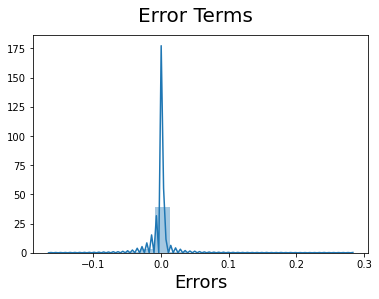

In [107]:
fig = plt.figure()
sns.distplot((y_train - y_train_rev), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [108]:
x_test

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0
...,...,...,...,...,...,...,...,...
313,15-03-2021,campaign 1,adgroup 4,ad 55,0.01,1,1,0
314,15-03-2021,campaign 1,adgroup 3,ad 55,0.01,5,1,0
315,15-03-2021,campaign 1,adgroup 1,ad 55,0.14,25,11,0
316,15-03-2021,campaign 1,adgroup 3,ad 56,0.06,9,4,0


In [109]:
x_test.drop(['campaign','date'],axis=1, inplace=True)
group = pd.get_dummies(x_test['adgroup'], drop_first = True)
x_test = pd.concat([x_test, group], axis = 1)
x_test['ad'] = x_test['ad'].map(lambda x: x.lstrip('ad '))
x_test['ad']=x_test['ad'].astype(str).astype(int)

In [110]:
x_test.drop('adgroup',axis=1, inplace=True)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_varst = ['ad','impressions', 'clicks', 'cost', 'conversions']
x_test[num_varst] = scaler.fit_transform(x_test[num_varst])

In [113]:
x_test.describe()

,ad,cost,impressions,clicks,conversions,adgroup 2,adgroup 3,adgroup 4
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.337668,0.108032,0.112491,0.107682,0.053669,0.198113,0.349057,0.169811
std,0.408285,0.167558,0.171903,0.163768,0.120165,0.399206,0.477423,0.376059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027027,0.005666,0.005102,0.007246,0.000000,0.000000,0.000000,0.000000
50%,0.081081,0.029745,0.032313,0.032609,0.000000,0.000000,0.000000,0.000000
75%,0.743243,0.138810,0.173469,0.147645,0.066667,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
x_test_new = sm.add_constant(x_test)

In [116]:
x_test_new = x_test_new.drop(["adgroup 3",'clicks'], axis = 1)

In [126]:
revenue = lr_fin.predict(x_test_new)

In [130]:
revenue.to_excel("W6 sub1.xlsx") 